In [1]:
%display latex

In [2]:
sage: maxima_calculus.eval('domain:real')
'real'

'real'

In [3]:
M = Manifold(4, 'M', structure='Lorentzian')
X.<t, r, th, ph> = M.chart(r't r:(0,+oo) th:(0,pi):\theta ph:(0,2*pi):\phi')
g = M.metric('g')
g[0, 0], g[1, 1], g[2, 2], g[3, 3] = -1, 1, r^2, r^2*sin(th)^2
g[:]

[           -1             0             0             0]
[            0             1             0             0]
[            0             0           r^2             0]
[            0             0             0 r^2*sin(th)^2]

Restrict the metric to the equatorial plane $\theta = \pi/2$

In [4]:
g.apply_map(lambda x: x.subs({th:pi/2}))
g[:]

[ -1   0   0   0]
[  0   1   0   0]
[  0   0 r^2   0]
[  0   0   0 r^2]

In [5]:
Gam = g.christoffel_symbols()
nab = M.affine_connection('nabla', r'\nabla')
nab[:] = Gam[:]
nab[:]

[[[0, 0, 0, 0], [0, 0, 0, 0], [0, 0, 0, 0], [0, 0, 0, 0]],
 [[0, 0, 0, 0], [0, 0, 0, 0], [0, 0, -r, 0], [0, 0, 0, -r]],
 [[0, 0, 0, 0], [0, 0, 1/r, 0], [0, 1/r, 0, 0], [0, 0, 0, 0]],
 [[0, 0, 0, 0], [0, 0, 0, 1/r], [0, 0, 0, 0], [0, 1/r, 0, 0]]]

In [49]:
nab.display()

Gam^r_th,th = -r 
Gam^r_ph,ph = -r 
Gam^th_r,th = 1/r 
Gam^th_th,r = 1/r 
Gam^ph_r,ph = 1/r 
Gam^ph_ph,r = 1/r

Define the parameters $s, \epsilon$ and the constants $q, Q, m, \kappa, \Phi_0$. Also define the coordinates $\mathcal{U}, \mathcal{V}, \mathcal{X}^i$, which at coincidence are the coordinates in the limiting plane wave spacetime.

In [50]:
s, q, Q, m = var('s, q, Q, m')
eps, kap, phi_init = var('epsilon, kappa, Phi_0')
assume(eps>=0)
assume(s>=0)
assume(kap>0)
assume(m>0)
s, eps, kap, m, q, Q

(s, epsilon, kappa, m, q, Q)

In [51]:
U = function('U', nargs=2)(s, eps)
V = function('V', nargs=2)(s, eps)
X1 = function('X_1', nargs=2)(s, eps)
X2 = function('X_2', nargs=2)(s, eps)
U, V, X1, X2

(U(s, epsilon), V(s, epsilon), X_1(s, epsilon), X_2(s, epsilon))

Define the parallel propagated tetrad $(\dot{z}, n, e_1, e_2)$ on the null geodesic. See the sage file ``Flat space Coulomb tetrad'' for details on computing the form of the tetrad. Check that these vectors satisfy the quasi null orthogonality relations as well the parallel transport condition (that their acceleration vanishes).

In [9]:
zdot = M.vector_field(name=r'\dot{z}')
n = M.vector_field(name='n')
e1 = M.vector_field(name='e_1')
e2 = M.vector_field(name='e_2')
zdot[:] = [1/m, 1/m*sqrt(1 - kap^2/r^2), 0, kap/(m*r^2)]
n[:] = [m/2, -m/2*sqrt(1 - kap^2/r^2), 0, -kap*m/(2*r^2)]
e1[:] = [0, 0, 1/r, 0]
e2[:] = [0, -kap/r, 0, 1/r*sqrt(1 - kap^2/r^2)]
zdot[:], n[:], e1[:], e2[:]

([1/m, sqrt(-kappa^2/r^2 + 1)/m, 0, kappa/(m*r^2)],
 [1/2*m, -1/2*m*sqrt(-kappa^2/r^2 + 1), 0, -1/2*kappa*m/r^2],
 [0, 0, 1/r, 0],
 [0, -kappa/r, 0, sqrt(-kappa^2/r^2 + 1)/r])

In [10]:
g(zdot, zdot).display(), g(zdot, n).display(), g(zdot, e1).display(), g(zdot, e2).display()

(g(\dot{z},\dot{z}): M → ℝ
    (t, r, th, ph) ↦ 0,
 g(\dot{z},n): M → ℝ
    (t, r, th, ph) ↦ -1,
 g(\dot{z},e_1): M → ℝ
    (t, r, th, ph) ↦ 0,
 g(\dot{z},e_2): M → ℝ
    (t, r, th, ph) ↦ 0)

In [11]:
g(n, n).display(), g(n, e1).display(), g(n, e2).display()

(g(n,n): M → ℝ
    (t, r, th, ph) ↦ 0,
 g(n,e_1): M → ℝ
    (t, r, th, ph) ↦ 0,
 g(n,e_2): M → ℝ
    (t, r, th, ph) ↦ 0)

In [12]:
g(e1, e1).display(), g(e1, e2).display(), g(e2, e2).display()

(g(e_1,e_1): M → ℝ
    (t, r, th, ph) ↦ 1,
 g(e_1,e_2): M → ℝ
    (t, r, th, ph) ↦ 0,
 g(e_2,e_2): M → ℝ
    (t, r, th, ph) ↦ 1)

In [13]:
acc_z = nab(zdot).contract(zdot)
acc_n = nab(n).contract(zdot)
acc_e1 = nab(e1).contract(zdot)
acc_e2 = nab(e2).contract(zdot)
acc_z[:], acc_n[:], acc_e1[:], acc_e2[:]

([0, 0, 0, 0], [0, 0, 0, 0], [0, 0, 0, 0], [0, 0, 0, 0])

Analysis of timelike curves limiting to a null geodesic ($\epsilon \to 0$) in flat space in the presence of a Coulomb field sourced by a charge Q at the origin. The timelike curves can be thought to represent test particles of mass m and charge q. assume the curves have an angular momentum $l = \frac{\kappa}{\epsilon}$ where the parameter $\epsilon$ is the related to the energy $E$ as $E = 1/\epsilon$.

The governing ODEs are (in terms of affine parameter s):
$
\frac{dt}{ds} = \frac{1}{m} \bigg ( 1 + \frac{\epsilon q Q}{r} \bigg ) \\
\frac{d \phi}{ds} = \frac{\kappa}{m r^2} \\
\frac{dr}{ds} = \pm \frac{1}{m} \bigg ( 1 - \frac{\kappa^2}{r^2} + \epsilon \frac{2 q Q}{r} + \epsilon^2 \big( \frac{q^2 Q^2}{r^2} - m^2 \big ) \bigg )^{1/2}
$

As $\epsilon \rightarrow 0$, these timelike curves limit to the non-radial null geodesic.

Now define the tangent vector to the ultrarelativistic family $\partial_s Y^{a'} = ( \partial_s t, \partial_s r, \partial_s \theta, \partial_s \phi)$, and the deviation vector $\xi^{a'} = \partial_{\epsilon} Y^{a'} = ( \xi^t, \xi^r, \xi^{\theta}, \xi^{\phi} )$.

In [14]:
dsY = M.vector_field(name=r'\partial_s Y')
dsY[:] = [1/m*(1 + eps*q*Q/r), 1/m*sqrt(1 + eps*2*q*Q/r + eps^2*(q^2*Q^2/r^2 - m^2) - kap^2/r^2), 0, kap/(m * r^2)]
dsY[:]

[(Q*epsilon*q/r + 1)/m,
 sqrt(-(m^2 - Q^2*q^2/r^2)*epsilon^2 + 2*Q*epsilon*q/r - kappa^2/r^2 + 1)/m,
 0,
 kappa/(m*r^2)]

In [23]:
xi = M.vector_field(name=r'\xi')
xi_t = function(r'\xi^t', nargs=2)(s, eps)
xi_r = function(r'\xi^{r}', nargs=2)(s, eps)
xi_th = function(r'\xi^{\theta}', nargs=2)(s, eps)
xi_ph = function(r'\xi^{\phi}', nargs=2)(s, eps)
xi[:] = [xi_t, xi_r, xi_th, xi_ph]
xi[:]

[\xi^t(s, epsilon),
 \xi^{r}(s, epsilon),
 \xi^{\theta}(s, epsilon),
 \xi^{\phi}(s, epsilon)]

In [25]:
K = M.vector_field(name='K')
K_t = function(r'K^t', nargs=2)(s, eps)
K_r = function(r'K^r', nargs=2)(s, eps)
K_th = function(r'K^{\theta}', nargs=2)(s, eps)
K_ph = function(r'K^{\phi}', nargs=2)(s, eps)
K[:] = [K_t, K_r, K_th, K_ph]
K[:]

[K^t(s, epsilon),
 K^r(s, epsilon),
 K^{\theta}(s, epsilon),
 K^{\phi}(s, epsilon)]

In [27]:
xi.display()

\xi = \xi^t(s, epsilon) ∂/∂t + \xi^{r}(s, epsilon) ∂/∂r + \xi^{\theta}(s, epsilon) ∂/∂th + \xi^{\phi}(s, epsilon) ∂/∂ph

In [39]:
H = M.vector_field(name='H')
H[:] = [s, eps*s^2 + sin(s), 0, 2*s + eps]
H[:]

[s, epsilon*s^2 + sin(s), 0, epsilon + 2*s]

In [43]:
g(dsY, K).display()

R[write to console]: Error in is.finite() : 0 arguments passed to 'is.finite' which requires 1



RRuntimeError: Error in is.finite() : 0 arguments passed to 'is.finite' which requires 1


From EOM analysis the radial coordinates $t, r, \phi$ satisfy the differential equations below. Taylor expanding that up to $\mathcal{O} (\epsilon^2)$

In [196]:
dsr = 1/m*sqrt(1 + eps*2*q*Q/r + eps^2*(q^2*Q^2/r^2 - m^2) - kap^2/r^2)
dst = 1/m*(1 + eps*q*Q/r)
dsphi = kap/(m * r^2)
dsr, dst, dsphi

(sqrt(-(m^2 - Q^2*q^2/(epsilon^2*r_2(s) + epsilon*r_1(s) + r_0(s))^2)*epsilon^2 + 2*Q*epsilon*q/(epsilon^2*r_2(s) + epsilon*r_1(s) + r_0(s)) - kappa^2/(epsilon^2*r_2(s) + epsilon*r_1(s) + r_0(s))^2 + 1)/m,
 (Q*epsilon*q/(epsilon^2*r_2(s) + epsilon*r_1(s) + r_0(s)) + 1)/m,
 kappa/((epsilon^2*r_2(s) + epsilon*r_1(s) + r_0(s))^2*m))

In [197]:
deps_dsr = dsr.diff(eps, 1)
deps2_dsr = dsr.diff(eps, 2)
dsr.subs({eps:0}), deps_dsr.subs({eps:0}), deps2_dsr.subs({eps:0})

(sqrt(-kappa^2/r_0(s)^2 + 1)/m,
 (Q*q/r_0(s) + kappa^2*r_1(s)/r_0(s)^3)/(m*sqrt(-kappa^2/r_0(s)^2 + 1)),
 -(Q*q/r_0(s) + kappa^2*r_1(s)/r_0(s)^3)^2/(m*(-kappa^2/r_0(s)^2 + 1)^(3/2)) - (m^2 - Q^2*q^2/r_0(s)^2 + 2*Q*q*r_1(s)/r_0(s)^2 + 3*kappa^2*r_1(s)^2/r_0(s)^4 - 2*kappa^2*r_2(s)/r_0(s)^3)/(m*sqrt(-kappa^2/r_0(s)^2 + 1)))

In [198]:
deps_dst = dst.diff(eps, 1)
deps2_dst = dst.diff(eps, 2)
dst.subs({eps:0}), deps_dst.subs({eps:0}), deps2_dst.subs({eps:0})

(1/m, Q*q/(m*r_0(s)), -2*Q*q*r_1(s)/(m*r_0(s)^2))

In [199]:
deps_dsphi = dsphi.diff(eps, 1)
deps2_dsphi = dsphi.diff(eps, 2)
dsphi.subs({eps:0}), deps_dsphi.subs({eps:0}), deps2_dsphi.subs({eps:0})

(kappa/(m*r_0(s)^2),
 -2*kappa*r_1(s)/(m*r_0(s)^3),
 6*kappa*r_1(s)^2/(m*r_0(s)^4) - 4*kappa*r_2(s)/(m*r_0(s)^3))

From the general theory, we know that at first order, $[ D_{\epsilon s} Y^a ] = \dot{z}^a [ \partial_{\epsilon s} \mathcal{U} ] + e^a_i [ \partial_U \mathcal{X}^i ]$. This implies $\dot{z}_a [ D_{\epsilon s} Y^a ] = 0$.

In [200]:
dsY = M.vector_field(name=r'\partial_s Y')
dsY[:] = [dst, dsr, 0, dsphi]
dsY[:]

[(Q*epsilon*q/(epsilon^2*r_2(s) + epsilon*r_1(s) + r_0(s)) + 1)/m,
 sqrt(-(m^2 - Q^2*q^2/(epsilon^2*r_2(s) + epsilon*r_1(s) + r_0(s))^2)*epsilon^2 + 2*Q*epsilon*q/(epsilon^2*r_2(s) + epsilon*r_1(s) + r_0(s)) - kappa^2/(epsilon^2*r_2(s) + epsilon*r_1(s) + r_0(s))^2 + 1)/m,
 0,
 kappa/((epsilon^2*r_2(s) + epsilon*r_1(s) + r_0(s))^2*m)]

In [202]:
xi = M.vector_field(name=r'\xi')
xi[:] = [q*Q*asinh(sqrt(r0^2/kap^2 - 1)), (q*Q*sqrt(1 - kap^2/r0^2)*asinh(sqrt(r0^2/kap^2 - 1)) - X2*kap/r0), X1/r0, kap*q*Q*asinh(sqrt(r0^2/kap^2 - 1))/r0^2 + sqrt(1 - kap^2/r0^2)*X2/r0]
xi[:]

[Q*q*arcsinh(sqrt(r_0(s)^2/kappa^2 - 1)),
 Q*q*sqrt(-kappa^2/r_0(s)^2 + 1)*arcsinh(sqrt(r_0(s)^2/kappa^2 - 1)) - kappa*X_2(s, epsilon)/r_0(s),
 X_1(s, epsilon)/r_0(s),
 Q*kappa*q*arcsinh(sqrt(r_0(s)^2/kappa^2 - 1))/r_0(s)^2 + sqrt(-kappa^2/r_0(s)^2 + 1)*X_2(s, epsilon)/r_0(s)]

In [222]:
DdsY = nab(dsY)
intvec = DdsY.contract(xi)
intvec.apply_map(lambda x: x.subs({th:pi/2}))
intvec.apply_map(lambda y: y.subs({R:r0}))
intvec.apply_map(lambda y: y.subs({eps:0}))
intvec[:]

[0,
 -(Q*kappa^2*q*arcsinh(sqrt(kappa + r_0(s))*sqrt(-kappa + r_0(s))/kappa)*r_0(s) + sqrt(kappa + r_0(s))*kappa*sqrt(-kappa + r_0(s))*X_2(s, 0)*r_0(s))/(m*r_0(s)^4),
 I*sqrt(kappa^2 - r_0(s)^2)*X_1(s, 0)/(m*abs(r_0(s))*r_0(s)^2),
 (Q*sqrt(kappa + r_0(s))*kappa*sqrt(-kappa + r_0(s))*q*abs(r_0(s))*arcsinh(sqrt(kappa + r_0(s))*sqrt(-kappa + r_0(s))/kappa)*r_0(s) - kappa^2*X_2(s, 0)*abs(r_0(s))*r_0(s) + (I*Q*kappa*q*arcsinh(sqrt(kappa + r_0(s))*sqrt(-kappa + r_0(s))/kappa)*r_0(s)^2 + I*sqrt(kappa + r_0(s))*sqrt(-kappa + r_0(s))*X_2(s, 0)*r_0(s)^2)*sqrt(kappa^2 - r_0(s)^2))/(m*abs(r_0(s))*r_0(s)^5)]

In [63]:
depssY = M.vector_field(name=r'D_{\epsilon s} Y')
depssY[:] = [deps_dst.subs({eps:0}), deps_dsr.subs({eps:0}), 0, deps_dsphi.subs({eps:0})]
depssY[:]

[Q*q/(m*r_0(s)),
 (Q*q/r_0(s) - kappa_0*kappa_1/r_0(s)^2 + kappa_0^2*r_1(s)/r_0(s)^3)/(m*sqrt(-kappa_0^2/r_0(s)^2 + 1)),
 0,
 kappa_1/(m*r_0(s)^2) - 2*kappa_0*r_1(s)/(m*r_0(s)^3)]

In [64]:
g.apply_map(lambda x: x.subs({th:pi/2}))
g.apply_map(lambda x: x.subs({R:r0}))
zdot.apply_map(lambda x: x.subs({R:r0}))
g(zdot, depssY).display()

g(\dot{z},D_{\epsilon s} Y): M → ℝ
   (t, R, th, ph) ↦ -kappa_0^2*r_1(s)/(m^2*r_0(s)^3)

In [391]:
l = -kap*q*Q/(s*sqrt(kap^2 + s^2/m^2))
l.integral(s), l.integral(s, algorithm='mathematica_free')

(Q*q*arcsinh(kappa*m/s), Q*q*arctanh(sqrt(κ^2 + s^2/m^2)/κ))

In [399]:
l.integral(s, algorithm='maxima'), l.integral(s, algorithm='sympy'), l.integral(s, algorithm='giac')

(Q*q*arcsinh(kappa*m/s),
 Q*q*arcsinh(kappa*m/s),
 1/2*Q*kappa*m*q*(log(kappa*m + sqrt(kappa^2*m^2 + s^2))/(kappa*m) - log(-kappa*m + sqrt(kappa^2*m^2 + s^2))/(kappa*m)))

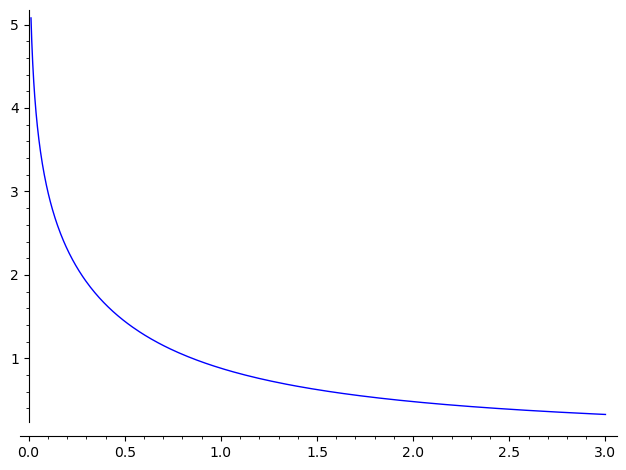

In [402]:
plot(asinh(1/s), s, 0, 3)

Now the tangent vector in the outside-in part is $\partial_s Y^a = \dot{z}^a \partial_s \mathcal{U} + \lambda e^a_i \partial_s \mathcal{X}^i + \lambda^2 n^a \partial_s \mathcal{V}$. At coincidence, $\dot{z}^a = \dot{z}^a [\partial_s \mathcal{U}] \implies \mathcal{U} = s + \mathcal{O} (\lambda)$.

Solve the ODEs at each order. The zeroth order equation gives

In [303]:
r0_tempsol = desolve(r0.diff(s, 1) - dsr.subs({eps:0}), r0, ivar=s)
r0_tempsol

sqrt(-kappa^2 + r_0(s)^2)*m == _C + s

For some initial value of the independent variable $s = 0$, choose $r_0 (s = 0) = \kappa$, so that $r_0 (s) = \sqrt{\kappa^2 + s^2/m^2}$

In [305]:
r0_sol = sqrt(kap^2 + s^2/m^2)
r0_sol

sqrt(kappa^2 + s^2/m^2)

In [306]:
t0_tempsol = desolve(t0.diff(s, 1) - dst.subs({eps:0}), t0, ivar=s)
t0_tempsol

_C + s/m

In [307]:
t0_sol = s/m
t0_sol

s/m

In [308]:
dsphi_int = dsphi.subs({eps:0}).subs({r0:r0_sol})
dsphi_int
dsphi_tempsol = desolve(phi0.diff(s, 1) - dsphi_int, phi0, ivar=s)
dsphi_tempsol

_C + arctan(s/(kappa*m))

In [309]:
phi0 = phi_init + atan(s/(kap*m))
phi0

Phi_0 + arctan(s/(kappa*m))

The zeroth order solution is the solution for the null geodesic. At next order, we need to use the first $\epsilon$ derivatives of the components of the tangent vector.

In [310]:
depsdst_int = depsdst.subs({eps:0}).subs({r0:r0_sol})
t1_tempsol = desolve(t1.diff(s, 1) - depsdst_int, t1, ivar=s)
t1_tempsol

Q*q*arcsinh(s/(kappa*m)) + _C

The tangent vector to the UR family in flat space is $\partial_s Y^a = \dot{z}^a \partial_s \mathcal{U} + \epsilon e^a_i \partial_s \mathcal{X}^i + \epsilon^2 n^a \partial_s \mathcal{V}$

In [312]:
K = 1/sqrt(m^2*kap^2 + s^2)
K.integral(s)

arcsinh(s/(kappa*m))

In [244]:
Upw = function('U', nargs=2)(s, eps)
Vpw = function('V', nargs=2)(s, eps)
X1pw = function('X_1', nargs=2)(s, eps)
X2pw = function('X_2', nargs=2)(s, eps)
Upw, Vpw, X1pw, X2pw

(U(s, epsilon), V(s, epsilon), X_1(s, epsilon), X_2(s, epsilon))

In [252]:
dsY = M.vector_field(name=r'\partial_s Y')
dsY = zdot*Upw.diff(s, 1) + eps*e1*X1pw + eps*e2*X2pw + eps^2*n*Vpw
dsY.display()

1/2*(epsilon^2*m^2*V(s, epsilon) + 2*d(U)/ds)/m ∂/∂t - 1/2*(2*epsilon*kappa*m*X_2(s, epsilon) - (-I*epsilon^2*m^2*V(s, epsilon) + 2*I*d(U)/ds)*sqrt(R + kappa)*sqrt(-R + kappa))/(R*m) ∂/∂R + epsilon*X_1(s, epsilon)/R ∂/∂th - 1/2*(epsilon^2*kappa*m^2*V(s, epsilon) - 2*I*sqrt(R + kappa)*sqrt(-R + kappa)*epsilon*m*X_2(s, epsilon) - 2*kappa*d(U)/ds)/(R^2*m) ∂/∂ph

In [889]:
#Substitute zeroth order solution and simplify the radical
Oeps_termint2 = Oeps_termint1.substitute_function({r0:r0_sol}).rhs()
Oeps_termfinal = Oeps_termint2.canonicalize_radical()
Oeps_termfinal

(Q*R_0^2*m^2*q + 2*Q*sqrt(R_0 + kappa)*sqrt(R_0 - kappa)*m*q*s + kappa^2*m^2*r_1(s) + Q*q*s^2)*sqrt((R_0^2 - kappa^2)*m^2 + 2*sqrt(R_0 + kappa)*sqrt(R_0 - kappa)*m*s + s^2)/((R_0^4 - R_0^2*kappa^2)*m^4 + (6*R_0^2 - 5*kappa^2)*m^2*s^2 + s^4 + 2*((2*R_0^2 - kappa^2)*m^3*s + 2*m*s^3)*sqrt(R_0 + kappa)*sqrt(R_0 - kappa))

In [287]:
integrate(1/sqrt(m^2*kap^2 + s^2), s)

arcsinh(s/(kappa*m))

In [284]:
S = var('S')
assume(S > s0)
integrate(1/((s - s0)*sqrt(1 + (s - s0)^2/(m^2*kap^2))), s)

-arcsinh(kappa*m/(s - s_0))

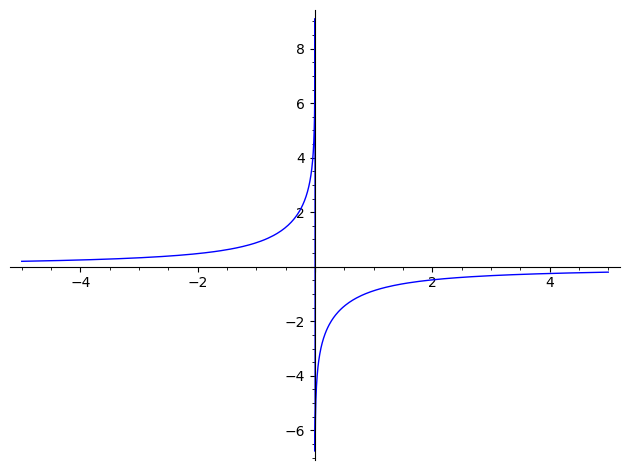

In [286]:
plot(-asinh(1/x), x, -5, 5)

Solving the first order ODE:

In [890]:
assume(kappa>0)
assume(R0>kap)
assume(m>0)
r1_sol = desolve(r1.derivative(s, 1) - Oeps_termfinal, r1, ivar=s)
r1_sol

(_C + integrate(((Q*R_0^6 - Q*R_0^4*kappa^2)*m^6*q + (15*Q*R_0^4 - 18*Q*R_0^2*kappa^2 + 4*Q*kappa^4)*m^4*q*s^2 + (15*Q*R_0^2 - 13*Q*kappa^2)*m^2*q*s^4 + Q*q*s^6 + 2*((3*Q*R_0^4 - 2*Q*R_0^2*kappa^2)*m^5*q*s + 2*(5*Q*R_0^2 - 3*Q*kappa^2)*m^3*q*s^3 + 3*Q*m*q*s^5)*sqrt(R_0 + kappa)*sqrt(R_0 - kappa))*sqrt((R_0^2 - kappa^2)*m^2 + 2*sqrt(R_0 + kappa)*sqrt(R_0 - kappa)*m*s + s^2)*e^(-kappa^2*m^2*integrate(sqrt(R_0^2*m^2 - kappa^2*m^2 + 2*sqrt(R_0 + kappa)*sqrt(R_0 - kappa)*m*s + s^2)/(2*(2*sqrt(R_0 - kappa)*R_0^2 - sqrt(R_0 - kappa)*kappa^2)*sqrt(R_0 + kappa)*m^3*s + (R_0^4 - R_0^2*kappa^2)*m^4 + (6*R_0^2 - 5*kappa^2)*m^2*s^2 + 4*sqrt(R_0 + kappa)*sqrt(R_0 - kappa)*m*s^3 + s^4), s))/((R_0^8 - 2*R_0^6*kappa^2 + R_0^4*kappa^4)*m^8 + 2*(14*R_0^6 - 27*R_0^4*kappa^2 + 15*R_0^2*kappa^4 - 2*kappa^6)*m^6*s^2 + (70*R_0^4 - 110*R_0^2*kappa^2 + 41*kappa^4)*m^4*s^4 + 2*(14*R_0^2 - 13*kappa^2)*m^2*s^6 + s^8 + 4*((2*R_0^6 - 3*R_0^4*kappa^2 + R_0^2*kappa^4)*m^7*s + (14*R_0^4 - 18*R_0^2*kappa^2 + 5*kappa^4)*m^5*s^3 + (14*R_0^2 - 11*kappa^2)*m^3*s^5 + 2*m*s^7)*sqrt(R_0 + kappa)*sqrt(R_0 - kappa)), s))*e^(kappa^2*m^2*integrate(sqrt(R_0^2*m^2 - kappa^2*m^2 + 2*sqrt(R_0 + kappa)*sqrt(R_0 - kappa)*m*s + s^2)/(2*(2*sqrt(R_0 - kappa)*R_0^2 - sqrt(R_0 - kappa)*kappa^2)*sqrt(R_0 + kappa)*m^3*s + (R_0^4 - R_0^2*kappa^2)*m^4 + (6*R_0^2 - 5*kappa^2)*m^2*s^2 + 4*sqrt(R_0 + kappa)*sqrt(R_0 - kappa)*m*s^3 + s^4), s))

In [891]:
#plot(r1_sol(q=1, Q=1, kappa=4, C_r=3), (s, 0, 4))

We now proceed to extract the second order coefficient from the Taylor expansion and substitute the zeroth and first order solutions in it.

In [892]:
# Oeps2_termint1 = dsr.taylor(eps, 0, 2).coefficient(eps, 2)
# Oeps2_termint2 = Oeps2_termint1.substitute_function({r0:r0_sol}).rhs()
# Oeps2_termint3 = Oeps2_termint2.substitute_function({r1:r1_sol})
# Oeps2_termfinal = Oeps2_termint3.canonicalize_radical()
# Oeps2_termfinal

In [893]:
# r2_sol = desolve(r2.derivative(s, 1) - Oeps2_termfinal, r2, ivar=s)
# r2_sol

Analysis of $t (s, \epsilon)$: assume $t (s, \epsilon) = t_0 (s) + \epsilon t_1 (s) + \epsilon^2 t_2 (s)$. Using the EoM $\frac{dt}{ds} = 1 + \epsilon \frac{qQ}{r}$.

In [894]:
t0 = function('t_0', nargs=1)(s)
t1 = function('t_1', nargs=1)(s)
t2 = function('t_2', nargs=1)(s)
t = function('t', nargs=2)(s, eps)
t = t0 + eps * t1 + eps^2 * t2
t(s=1, eps=0)

epsilon^2*t_2(1) + epsilon*t_1(1) + t_0(1)

In [895]:
dst = function(r'\dot{t}', nargs=2)(s, eps)
dst = 1/m*(1 + eps*q*Q/r)
dst

(Q*epsilon*q/(epsilon^2*r_2(s) + epsilon*r_1(s) + r_0(s)) + 1)/m

In [896]:
dst_taylor = dst.taylor(eps, 0, 2)
dst_taylor

-Q*epsilon^2*q*r_1(s)/(m*r_0(s)^2) + Q*epsilon*q/(m*r_0(s)) + 1/m

Analysis of $\phi (s, \epsilon)$: assume $\phi (s, \epsilon) = \phi_0 (s) + \epsilon \phi_1 (s) + \epsilon^2 \phi_2 (s)$. Using the EoM $\frac{d \phi}{ds} = \frac{\kappa}{m r^2}$.

In [897]:
phi0 = function('phi_0', nargs=1)(s)
phi1 = function('phi_1', nargs=1)(s)
phi2 = function('phi_2', nargs=1)(s)
phi = phi0 + eps * phi1 + eps^2 * phi2
phi

epsilon^2*phi_2(s) + epsilon*phi_1(s) + phi_0(s)

In [898]:
dsphi = kap/(m*r^2)
dsphi

kappa/((epsilon^2*r_2(s) + epsilon*r_1(s) + r_0(s))^2*m)

In [899]:
dsphi_taylor = dsphi.taylor(eps, 0, 2)
dsphi_taylor

-2*epsilon*kappa*r_1(s)/(m*r_0(s)^3) + (3*kappa*r_1(s)^2 - 2*kappa*r_0(s)*r_2(s))*epsilon^2/(m*r_0(s)^4) + kappa/(m*r_0(s)^2)

The tangent vector to the family $Y (U, \epsilon)$ is $\dot{Y} = (\partial_s t, \partial_s r, \partial_s , \theta, \partial_s \phi)$. It limits to $\dot{z} = \lim_{\epsilon \to 0} \dot{Y}$. Check that $\dot{z}$ is the tangent to an affinely parametrised null geodesic.

In [900]:
dsY = M.vector_field(name=r'\dot{Y}')
zdot = M.vector_field(name=r'\dot{z}')
dsY[:] = [dst, dsr, 0, dsphi]
dsY[:]

[(Q*epsilon*q/(epsilon^2*r_2(s) + epsilon*r_1(s) + r_0(s)) + 1)/m,
 sqrt(-(m^2 - Q^2*q^2/(epsilon^2*r_2(s) + epsilon*r_1(s) + r_0(s))^2)*epsilon^2 + 2*Q*epsilon*q/(epsilon^2*r_2(s) + epsilon*r_1(s) + r_0(s)) - kappa^2/(epsilon^2*r_2(s) + epsilon*r_1(s) + r_0(s))^2 + 1)/m,
 0,
 kappa/((epsilon^2*r_2(s) + epsilon*r_1(s) + r_0(s))^2*m)]

In [901]:
zdot[:] = [1/m, 1/m*sqrt(1 - kap^2/R^2), 0, kap/(m*R^2)]
zdot[:]

[1/m, sqrt(-kappa^2/R^2 + 1)/m, 0, kappa/(R^2*m)]

To check if this is a null vector, we need to compute its norm.

In [902]:
assume(kap<R)
g(zdot, zdot).display()

g(\dot{z},\dot{z}): M → ℝ
   (t, R, th, ph) ↦ 0

Compute its acceleration $D_U \dot{z} = ( \dot{z} \cdot \nabla ) \dot{z}$. To check parallel transport, we need to compute $g_{bc} \dot{z}^b \nabla^c \dot{z}^a$.

In [903]:
Dzdot = nab(zdot)
Dzdot.apply_map(lambda cmp: cmp.subs({th:pi/2}))
Dzdot.contract(zdot)[:]

[0, 0, 0, 0]

$\dot{z}$ is only the first element of the quasi-null frame $(\dot{z}, n, e_i)$. We need to compute the other elements using the orthogonality relations $\dot{z} \cdot n = -1$, $\dot{z} \cdot e_i = 0$, $n \cdot n = 0$, $e_i \cdot e_j = \delta_{ij}$, and $n \cdot \dot{z} = 0$. See the file "Flat_Space_Coulomb_tetrad" for the calculation of the components of this frame.

In [904]:
# assume(kap^2/R^2<1)
n = M.vector_field(name='n')
e1 = M.vector_field(name='e_1')
e2 = M.vector_field(name='e_2')
n[:] = [m/2, -m/2*sqrt(1 - kap^2/R^2), 0, -kap*m/(2*R^2)]
e1[:] = [0, 0, 1/R, 0]
e2[:] = [0, -kap/R, 0, 1/R*(1 - kap^2/R^2)^(1/2)]
n[:], e1[:], e2[:]

([1/2*m, -1/2*m*sqrt(-kappa^2/R^2 + 1), 0, -1/2*kappa*m/R^2],
 [0, 0, 1/R, 0],
 [0, -kappa/R, 0, sqrt(-kappa^2/R^2 + 1)/R])

In [905]:
g(e1, e1).display(), g(zdot, e1).display()    #e1 is purely spacelike

(g(e_1,e_1): M → ℝ
    (t, R, th, ph) ↦ 1,
 g(\dot{z},e_1): M → ℝ
    (t, R, th, ph) ↦ 0)

In [906]:
g(zdot, n).display(), g(n, e2).display(), g(e2, e2).display()

(g(\dot{z},n): M → ℝ
    (t, R, th, ph) ↦ -1,
 g(n,e_2): M → ℝ
    (t, R, th, ph) ↦ 0,
 g(e_2,e_2): M → ℝ
    (t, R, th, ph) ↦ -(R^2 - 2*kappa^2)/R^2)

In [907]:
e2.down(g)[:]

[0, -kappa/R, 0, I*sqrt(R + kappa)*sqrt(R - kappa)]

In [771]:
e3 = e2.contract(e2.down(g))
e3.display()

M → ℝ
(t, R, th, ph) ↦ -(R^2 - 2*kappa^2)/R^2

In [909]:
De1 = nab(e1)
De1.apply_map(lambda x: x.subs({th:pi/2}))
De1.contract(zdot)[:]    # e1 is parallel transported.

[0, 0, 0, 0]

Use the inner product algebraic relations to get conditions on the components of $n$ and $e_2$.

In [910]:
g(n, n).display(), g(n, e2).display(), g(n, zdot).display()

(g(n,n): M → ℝ
    (t, R, th, ph) ↦ 0,
 g(n,e_2): M → ℝ
    (t, R, th, ph) ↦ 0,
 g(n,\dot{z}): M → ℝ
    (t, R, th, ph) ↦ -1)

In [911]:
g(e2, zdot).display(), g(e2, e2).display()

(g(e_2,\dot{z}): M → ℝ
    (t, R, th, ph) ↦ 0,
 g(e_2,e_2): M → ℝ
    (t, R, th, ph) ↦ -(R^2 - 2*kappa^2)/R^2)

In [912]:
Dn = nab(n)
Dn.apply_map(lambda x: x.subs({th:pi/2}))
Dn.contract(zdot)[:]

[0, 0, 0, 0]

In [913]:
De2 = nab(e2)
De2.apply_map(lambda x: x.subs({th:pi/2}))
De2.contract(zdot)[:]

[0, 0, 0, -2*(R^2 - kappa^2)/(R^4*m)]